# <font color=green>Hypothesis Testing</font>
- claim or assumption that you make about one or more population paramter

### Types of Test

- **T-Test**
    - 1 sample T-test
    - 2 sample T-test
- **Anova Test(F-Test)**
- **Chi-Squared Test**

# <font color=red>T-Test</font>
- T-test will tell us does sample mean and population mean are diffrerent
- T-test are similar to the normal distribution in many cases 
- T-test is shorter than normal distribution and flatter tail larger standard deviation
- we need to use T-test when population standard deviation unknown 
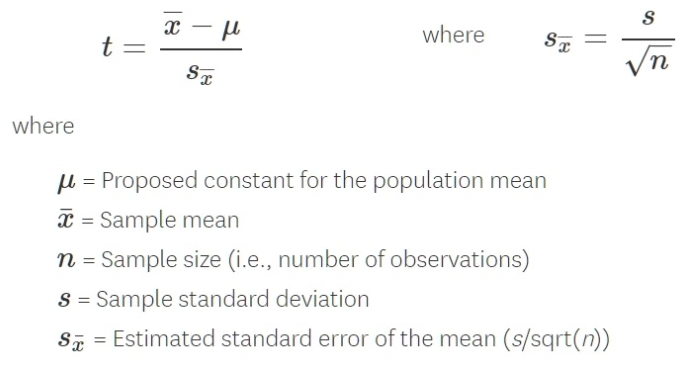

### import the required libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [2]:
## we are taking the random values giving the dataframe name as age

age = [12,13,14,55,42,22,23,25,22,21,25,25,45,46,47,49,41,43,33,32,31,33,34,35,36,37,38,39,50,52,54,58,60]

In [3]:
# total length of the age 
len(age)

33

In [4]:
## checking the population mean
age_mean = np.mean(age)
age_mean

36.121212121212125

In [5]:
# sample size in t-test need to <30 we took sample_size=10
sample_size = 10

## we need 10 sample size so we need to take random values from age dataframe
age_sample = np.random.choice(age,sample_size)
age_sample

array([13, 54, 46, 31, 45, 60, 23, 25, 36, 23])

In [6]:
## import the t-test library for 1 sample t-test 

from scipy.stats import ttest_1samp

# <font color='green'> Syntax T-Test</font>
## scipy.stats.ttest_1samp(a,popmean,axis=0)
- **a : an array or iterable object of sample observations**
- **popmean : expected mean in the null hypothesis**
- **axis : its an optional parameter. represents axis**

In [7]:
# finding t_test,p_value using T-test and 36 is age sample like population mean
T_test,P_value = ttest_1samp(age_sample,36)

In [8]:
print('T-test:{0} \nP-Value:{1}'.format(T_test,P_value))

T-test:-0.0829581178749459 
P-Value:0.9357006467556679


- p-value < alpha : Reject the Null Hypothesis(H0) and accept the Alternate Hypothesis(H1)
- p-value > alpha: Fail to Reject Null Hypothesis(H0) and Reject Alternate Hypothesis(H1)

In [9]:
# check like we need to accept the null hypothesis or reject the null hypothesis
## take alpha_value = 0.05 which is constant value

if P_value<0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail To Reject Null Hypothesis')
    
## we are Fail to reject the Null hypothesis because P_value > alpha ##

Fail To Reject Null Hypothesis


### Another Example in T-Test

In [10]:
import numpy as np
import scipy.stats as stats
import math

school there are many class lots of age difference now our problem is we are taking particular one class like 5th std we want to know that there is any age difference in the 5th std class 

In [11]:
school_age = stats.poisson.rvs(loc=18,mu=35,size=1800)
class_age = stats.poisson.rvs(loc=18,mu=30,size=65)

In [12]:
school_age.mean()

53.06388888888889

In [13]:
class_age.mean()

46.8

In [14]:
from scipy.stats import ttest_1samp
T_test,P_value = ttest_1samp(a=class_age,popmean=school_age.mean())

In [15]:
print('T-Test:{0} \nP-Value:{1}'.format(T_test,P_value))

T-Test:-9.38186115601443 
P-Value:1.2250356580736005e-13


In [16]:
if P_value<0.05:
    print('No Age Difference in the 5th std Class')
else:
    print('There is Age Difference in the 5th std Class')

No Age Difference in the 5th std Class


# <font color='red'> Two-Sample T-Test </font>

- The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test
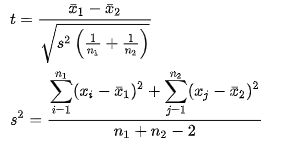

school there are many class lots of age difference now our problem is we are taking particular one class like 5th std section A and section B  we want to know that there is any age difference

In [17]:
## we are taking two section A and B
Class_A = stats.poisson.rvs(loc=18,mu=30,size=60)
Class_B = stats.poisson.rvs(loc=18,mu=30,size=60)

In [18]:
Class_A.mean()

48.11666666666667

In [19]:
Class_B.mean()

47.06666666666667

In [20]:
T_test,P_value = stats.ttest_ind(a=Class_A,b=Class_B,equal_var=True)

In [21]:
T_test

1.0985669209334072

In [22]:
P_value

0.27419347458619714

In [23]:
if P_value<0.05:
    print("No Age Difference in the Section A and B")
else:
    print('Age Difference in the Section A and B')

Age Difference in the Section A and B


### There is Age difference in the section A and B so we Fail to Reject Null Hypothesis

# <font color='red'>Anova Test(F-Test)</font>
- The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.
- in a sample if there are 2 or more group the T-Test will be hard so we need to perform the test for each combination of the groups then even type-1 error increases in this process we can use F-Test 
- when to use if there is two categorical variable were in one categorical variable were the values repeats and one numerical variable
- eg: Column:
 **|Student_id|Student_Branch|Student_Age|**
  - were branch repeats 

In [24]:
import seaborn as sns

In [25]:
## so we loading the dataset from the seaborn library

data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
df_anova = data[['petal_width','species']]
df_anova

,petal_width,species
0,0.2,setosa
1,0.2,setosa
2,0.2,setosa
3,0.2,setosa
4,0.2,setosa
...,...,...
145,2.3,virginica
146,1.9,virginica
147,2.0,virginica
148,2.3,virginica


In [31]:
# unique values in the species

anova_unique = pd.unique(df_anova['species'])
anova_unique

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
## taking the unique values in the species making the dataframe for which petal_width value is equal to species

data = {group:df_anova['petal_width'][df_anova['species']==group] for group in anova_unique}
data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [40]:
F_test,P_value = stats.f_oneway(data['setosa'],data['versicolor'],data['virginica']) 
print('F_test:{0} \nP_value:{1}'.format(F_test,P_value))

F_test:960.007146801809 
P_value:4.169445839443116e-85


In [42]:
if P_value<0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail To Reject Null Hypothesis')
    
    
# p_value is less than the alpha so reject the null hypothesis

Reject the Null Hypothesis


# <font color='red'>Chi-Square Test </font>
- The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

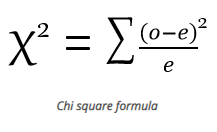

- **o = observed value**
- **e = expected value**

In [44]:
import seaborn as sns

# load dataset from seaborn 

chi_data = sns.load_dataset('tips')
chi_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
## chi squared will be used for two categorical variables from a dataframe so lets take sex and smoker columns in the data frame

chi_square = chi_data[['sex','smoker']]
chi_square.head()

,sex,smoker
0,Female,No
1,Male,No
2,Male,No
3,Male,No
4,Female,No


In [54]:
# let take crosstab for sex and smoker column to know the observed value

data = pd.crosstab(chi_square['sex'],chi_square['smoker'])
data

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [68]:
## observed value

observed_value = data.values
print('Observed_Value:\n {0}'.format(observed_value))

Observed_Value:
 [[60 97]
 [33 54]]


In [117]:
## import the required library for chi_squared 

from scipy.stats import chi2_contingency

## we need to know the chi_sqaured_stat value,P_value,Degree_of_freedom,expected value for chi-Squared statistics

chi = stats.chi2_contingency(observed_value)

#printed the chi_squared values
print('***********chi_squared values*********:\n',chi)

***********chi_squared values*********:
 (0.0, 1.0, 1, array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))


In [118]:
## chi_Squared stat values
Stat = chi[0]
print('Chi_Squared_Stat:',Stat)

Chi_Squared_Stat: 0.0


In [119]:
## P-value 
P_value = chi[1]
print('P_value:',P_value)

P_value: 1.0


In [120]:
## Degree of Freedom 
dof = chi[2]
print('Degree_Of_Freedom:',dof)

Degree_Of_Freedom: 1


In [121]:
## expected value 

expected_value = chi[3]
print('*******Expected_Value*******:\n',expected_value)

*******Expected_Value*******:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


In [122]:
## lets check will null hypothesis will accept or reject for Chi_Squared statistics

if P_value<0.05:
    print('Reject Null Hypothesis')
else:
    print('Fail To Reject Null Hypothesis')

Fail To Reject Null Hypothesis
